In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
a = 0
A = 0  #a'
v = 8  #Velocity
w = 2.61  #Rotational Velocity
roh = 1.225  #Density
B = 3  #No. of Blade
R = 21  #Radius of Rotor 
r_list = np.arange(4.5, 21, 1)  #list of radius from 4.5 to 21 with step of 1
c_list = np.linspace(1.63, 0.265, num=len(r_list))  #list of chord values from 1.63 to 0.265 
get_c = dict(zip(r_list, c_list))  # r value vs c value mapping 
Q_list = np.linspace(0.34,0.00035,num=len(r_list))  #list of thetha(Q) from 0.34 to 0.00035
get_Q = dict(zip(r_list,Q_list))  # r vs theta mapping

In [3]:
def get_Cd_Cl_list(r):
    if r<2:
        df_cd = pd.read_csv("sg6040 alpha  vs cd.csv")
        df_cl = pd.read_csv("sg6040 alpha vs cl.csv")
        alpha_list = list(df_cd["Alpha"]) 
        Cd_list = list(df_cd["Cd"]) 
        Cl_list = list(df_cl["Cl"])
        Cd_list = list(map(float, Cd_list))
        Cl_list = list(map(float, Cl_list))
    elif r<4 and r>=2:
        df_cd = pd.read_csv("sg6043 alpha vs cd.csv")
        df_cl = pd.read_csv("sg6043 alpha vs cl.csv")
        alpha_list = list(df_cd["Alpha"]) 
        Cd_list = list(df_cd["Cd"]) 
        Cl_list = list(df_cl["Cl"])
        Cd_list = list(map(float, Cd_list))
        Cl_list = list(map(float, Cl_list))
    else:
        df_cd = pd.read_csv("sg6050 alpha vs cd.csv")
        df_cl = pd.read_csv("sg6050 alpha vs cl.csv")
        alpha_list = list(df_cd["Alpha"]) 
        Cd_list = list(df_cd["Cd"]) 
        Cl_list = list(df_cl["Cl"])
        Cd_list = list(map(float, Cd_list))
        Cl_list = list(map(float, Cl_list))
    return Cl_list,Cd_list,alpha_list

In [4]:
def get_phi(a,A,v,w,r):
    val = (1-a)*v/((1+A)*w*r)
    phi = np.arctan(val)
    return phi

In [5]:
def get_CnCt(Cl,Cd,phi):
    Cn = Cl*np.cos(phi)+Cd*np.sin(phi)
    Ct = Cl*np.sin(phi)-Cd*np.sin(phi)
    return Cn,Ct

In [6]:
def get_sigma(r):  #Solidity Ratio
    c = get_c[r]
    sigma = B*c/(2*np.pi*r)
    return sigma

In [7]:
def get_aN_AN(sigma,Cn,Ct,phi):
    aN=1/((4*(np.sin(phi)**2)/(sigma*Cn))+1)
    AN = 1/((4*np.sin(phi)*np.cos(phi)/(sigma*Ct))-1)
    return aN,AN

In [8]:
r_final,alpha_final,Cn_final,Ct_final,Q_final=[],[],[],[],[]
for r in r_list:
    Cl_list,Cd_list,alpha_list = get_Cd_Cl_list(r)
    while(True):  #Breaks when error1 and error2 are less than 0.001
        
        phi=get_phi(a,A,v,w,r)  #Get phi value
        
        Q = get_Q[r]
    
        alpha = phi-Q  #Calculating alpha value
        
        alpha = alpha*np.pi/180  #converting alpha to degrees
    
        #Interpolating Cl and Cd for above alpha based on existing list values
        Cl = np.interp(alpha,alpha_list,Cl_list)  #Required x-value, x-list, y-list
        
        Cd = np.interp(alpha,alpha_list,Cd_list)
        print(Cl)
    
        Cn,Ct = get_CnCt(Cl,Cd,phi)  #Get Cn and Ct
    
        sigma = get_sigma(r)   #Get sigma
    
        aN,AN = get_aN_AN(sigma,Cn,Ct,phi)  #Get aN and AN values
    
        #error1 and error2
        error1 = aN-a 
        error2 = AN-A
    
        #Check is errors are less than 0.001
        if error1<0.001 and error2<0.001:
            r_final.append(r)
            alpha_final.append(alpha)
            Cn_final.append(Cn)
            Ct_final.append(Ct)
            Q_final.append(Q)
            break
        else:
            #Print("For r: ",r, " error1: ",error1," and error2: ",error2)
            a = aN
            A = AN

0.28165979772101596
0.281626555496836
0.281624871553995
0.2815224886884906
0.2815226636061876
0.2814537409382879
0.2814534157385773
0.2814075667657957
0.28140710752212544
0.2813776048421902
0.28137721687735856
0.28135960452178954
0.2813593713454317
0.28135062175273934
0.28134862078883893
0.28135187566293884
0.2813592966047099
0.28137007153619714
0.28138358406810016
0.2813993585661037
0.28141702253744133
0.2814362803530259
0.2814568945471195
0.2814786722828656


In [9]:
final_df = pd.DataFrame({"r":r_final,"Q":Q_final,"alpha":alpha_final,"Cn":Cn_final,"Ct":Ct_final})

In [10]:
r_final = np.array(r_final)
Cn_final = np.array(Cn_final)
Ct_final = np.array(Ct_final)

In [11]:
Pt = 0.5*roh*v*v*c_list*Ct_final  #Tangential Force

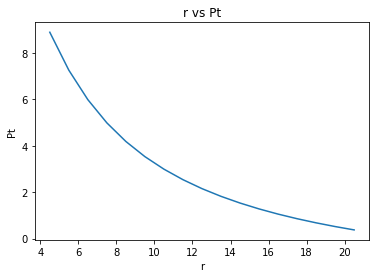

In [12]:
plt.plot(r_final,Pt)
plt.title("r vs Pt")
plt.xlabel("r")
plt.ylabel("Pt")
plt.show()

In [13]:
Pn = 0.5*roh*v*v*c_list*Cn_final  #Normal Force

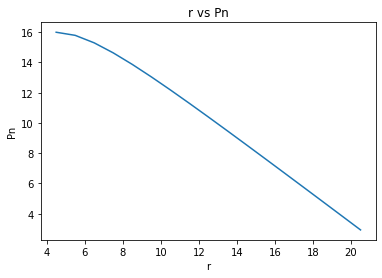

In [14]:
plt.plot(r_final,Pn)
plt.title("r vs Pn")
plt.xlabel("r")
plt.ylabel("Pn")
plt.show()

In [15]:
T = B*Pn*r_final  #Trust Force

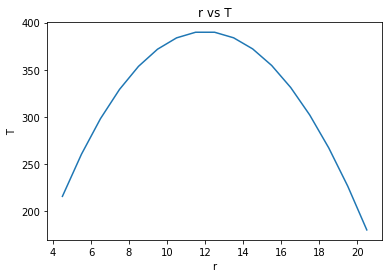

In [16]:
plt.plot(r_final,T)
plt.title("r vs T")
plt.xlabel("r")
plt.ylabel("T")
plt.show()

In [17]:
M = R*B*Pt*r_final  #Torque

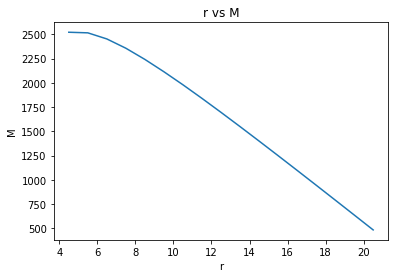

In [18]:
plt.plot(r_final,M)
plt.title("r vs M")
plt.xlabel("r")
plt.ylabel("M")
plt.show()